# Графический анализ

## 2D Graphs

**2D Histograms** являются графическими представлениями распределения частот выбранных переменных.

**2D Histograms Regular** (простые) – столбчатая диаграмма распределения частот.

На рисунке ниже представлена гистограмма распределения итогового балла. Из гистограммы видно, что чаще всего встречаются учащиеся, которые набрали от *65* до *70* баллов на экзамене.

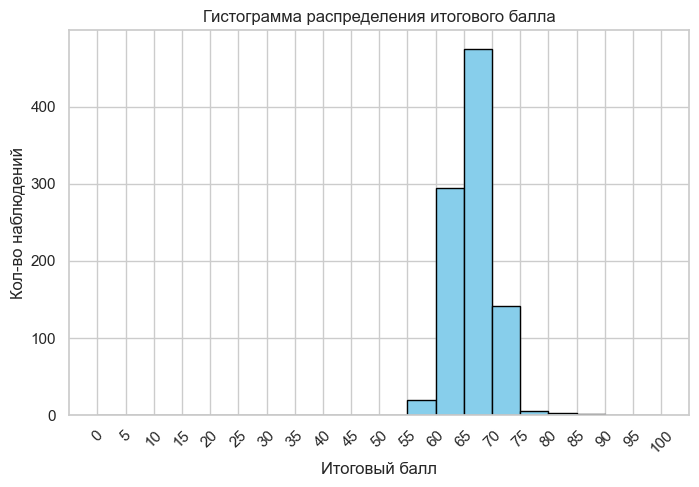

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

df = pd.read_csv("../data/student_perfomance_sample.csv")

bins = np.arange(0, 105, 5)
count = pd.cut(df["final_exam_score"], bins=bins, right=True, include_lowest=True).value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(bins[:-1], count.values, width=5, align="edge", edgecolor="black", color="skyblue")
plt.xticks(bins, rotation=45)
plt.xlabel("Итоговый балл")
plt.ylabel("Кол-во наблюдений")
plt.title("Гистограмма распределения итогового балла")
plt.show()

**2D Histograms Multiple** (составные) – изображают распределение частот для нескольких переменных на одном графике.

На рисунке ниже представлена гистограмма распределения итогового балла и результата предыдущего экзамена с отрезками длины 10, начало первого отрезка – 40, конец последнего – 100. Из гистограммы видно, что при заданных границах интервалов больше всего встречаются учащиеся с итоговым баллом и результатом предыдущего экзамена в интервале [60; 70].

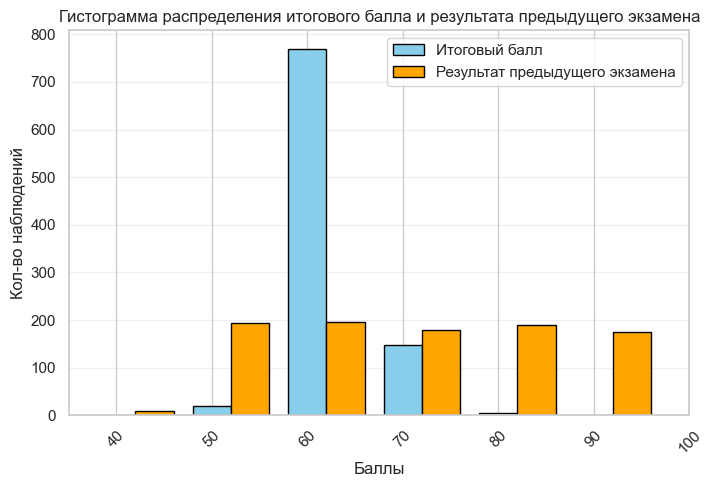

In [49]:
bins = np.arange(40, 110, 10)

final_exam_score_counts = pd.cut(df["final_exam_score"], bins=bins, right=True, include_lowest=True).value_counts().sort_index()
prev_exam_score_counts = pd.cut(df["prev_exam_score"], bins=bins, right=True, include_lowest=True).value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(bins[:-1]-2, final_exam_score_counts, width=4, align="edge", color="skyblue", edgecolor="black", label="Итоговый балл")
plt.bar(bins[:-1]+2, prev_exam_score_counts, width=4, align="edge", color="orange", edgecolor="black", label="Результат предыдущего экзамена")
plt.xticks(bins, rotation=45)
plt.xlabel("Баллы")
plt.ylabel("Кол-во наблюдений")
plt.title("Гистограмма распределения итогового балла и результата предыдущего экзамена")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.show()

**2D Histograms Double-Y** (с двойной осью Y) – комбинация двух по-разному масштабированных составных гистограмм.

На рисунке ниже построена гистограмма по двум разномасштабным переменным: среднее количество часов сна в сутки и среднее количество часов, потраченных в неделю на учебу. Из гистограммы видно, что чаще всего встречаются учащиеся со средним количеством часов сна в сутки от 5 до 10 (большинство значений попали в интервал) и со средним количеством часов, потраченных в неделю на учебу от 15 до 25 (так как количество наблюдений в интервалах [15;20] и [20;25] примерно равны).

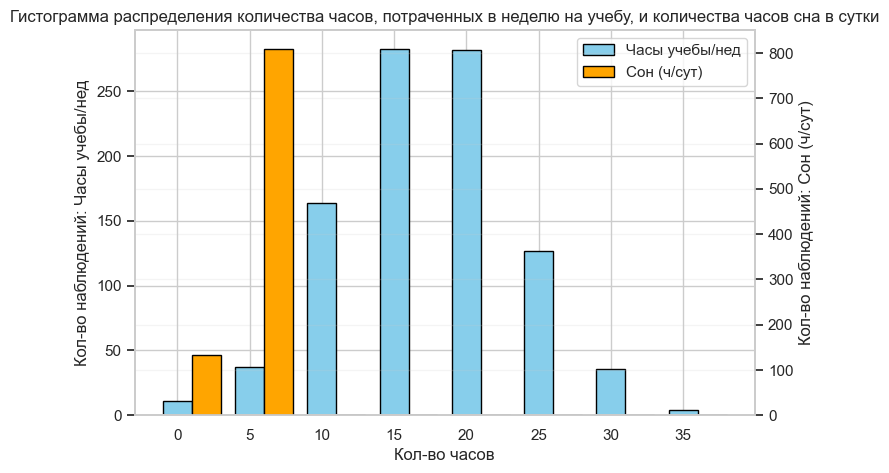

In [59]:
bins = np.arange(0, 45, 5)

study_counts = pd.cut(df["study_hours_week"], bins=bins, right=True, include_lowest=True).value_counts().sort_index()
sleep_counts = pd.cut(df["sleep_hours"], bins=bins, right=True, include_lowest=True).value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(bins[:-1]-1, study_counts.values, width=2, align="edge", color="skyblue", edgecolor="black", label="Часы учебы/нед")
ax1.set_xlabel("Кол-во часов")
ax1.set_ylabel("Кол-во наблюдений: Часы учебы/нед")

ax2 = ax1.twinx()
ax2.bar(bins[:-1]+1, sleep_counts.values, width=2, align="edge", color="orange", edgecolor="black", label="Сон (ч/сут)")
ax2.set_ylabel("Кол-во наблюдений: Сон (ч/сут)")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")
plt.title("Гистограмма распределения количества часов, потраченных в неделю на учебу, и количества часов сна в сутки")
ax2.grid(alpha=0.2)
plt.show()

**2D Scatterplots** (диаграммы рассеяния) визуализируют зависимость между двумя переменными.

**2D Scatterplots Regular** (простые) - визуализируют зависимость между двумя переменными X и Y.

На рисунке ниже изображена диаграмма, отображающая зависимости между количеством часов, потраченных в неделю на учебу, и итоговым баллом. Из диаграммы и по коэффициенту корреляции r видно, что проявляется умеренная взаимосвязь между этими переменными (с ростом количества часов растет и итоговый балл).

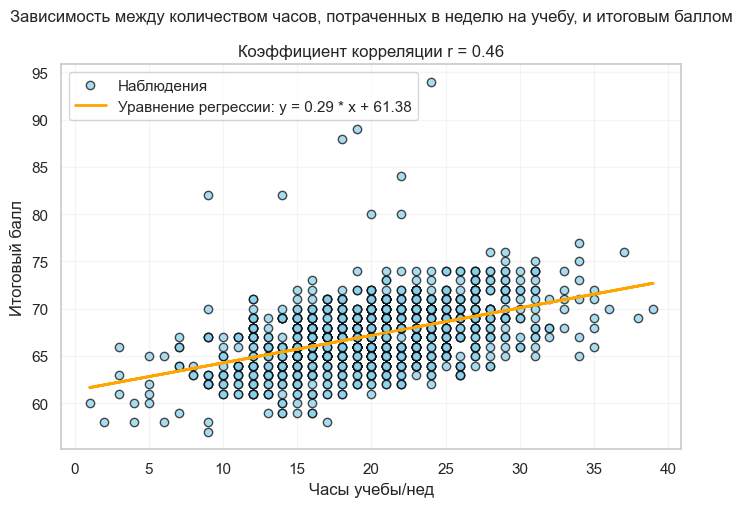

In [63]:
from scipy.stats import linregress

x = df["study_hours_week"]
y = df["final_exam_score"]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

plt.figure(figsize=(8,5))
plt.scatter(x, y, color="skyblue", edgecolor="black", alpha=0.7, label="Наблюдения")
plt.plot(x, line, color="orange", linewidth=2, label=f"Уравнение регрессии: y = {slope:.2f} * x + {intercept:.2f}")
plt.xlabel("Часы учебы/нед")
plt.ylabel("Итоговый балл")
plt.title(f"Зависимость между количеством часов, потраченных в неделю на учебу, и итоговым баллом\n\nКоэффициент корреляции r = {r_value:.2f}")
plt.legend()
plt.grid(alpha=0.2)
plt.show()